In [40]:
"""
Author: Roy Huang
Email: ruoqiuhuang@gmail.com
Date Created: January 28, 2025
Last Modified: January 28, 2025
Description: DC-GANs practice with Fashion MNIST dataset 
"""

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [41]:
N_EPOCHS = 200
BATCH_SIZE = 64
LR = 2e-4
B1 = 0.5
B2 = 0.999
LATENT_DIM = 100
IMG_SIZE = 28 * 28
CHANNELS = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [42]:
# Define the transform to convert the images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download the Fashion MNIST dataset
train_set = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

In [43]:
# data loader 
train_loader = torch.utils.data.DataLoader(train_set, batch_size= BATCH_SIZE, shuffle=True)

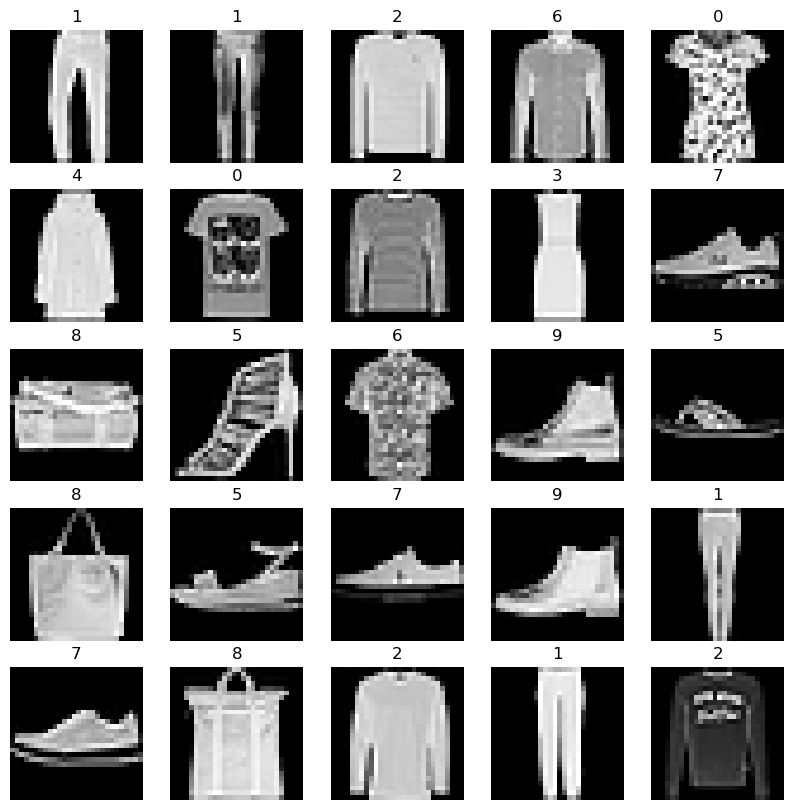

In [44]:
# Visualize some images from the dataset
def visualize_images(data_loader):
    images, labels = next(iter(data_loader))
    images = images.numpy()
    #print(labels)
    labels = labels.numpy()

    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

visualize_images(train_loader)

In [45]:
# generator model definition
class Generator(nn.Module): 
    def __init__(self): 
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(LATENT_DIM, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(128, momentum=0.8),

            nn.Linear(128, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(256, momentum=0.8), 

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(512, momentum=0.8), 

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(1024, momentum=0.8),

            nn.Linear(1024, IMG_SIZE),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), CHANNELS, 28, 28)
        return img

In [46]:
# Discriminator model definition
class Discriminator(nn.Module):
    def __init__(self): 
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(IMG_SIZE, 512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flattened = img.view(img.size(0), -1)
        result = self.model(img_flattened)
        return result

In [47]:
# gnerator and discriminator initialization
generator = Generator().to(DEVICE)
discriminator = Discriminator().to(DEVICE)

# loss function and optimizers
adversarial_loss = nn.BCELoss().to(DEVICE)
G_optimizer = optim.Adam(generator.parameters(), lr=LR, betas=(B1, B2))
D_optimizer = optim.Adam(discriminator.parameters(), lr=LR, betas=(B1, B2))

# Initial Training 

[Epoch 1/200] [D loss: 1.0928] [G loss: 1.1455]


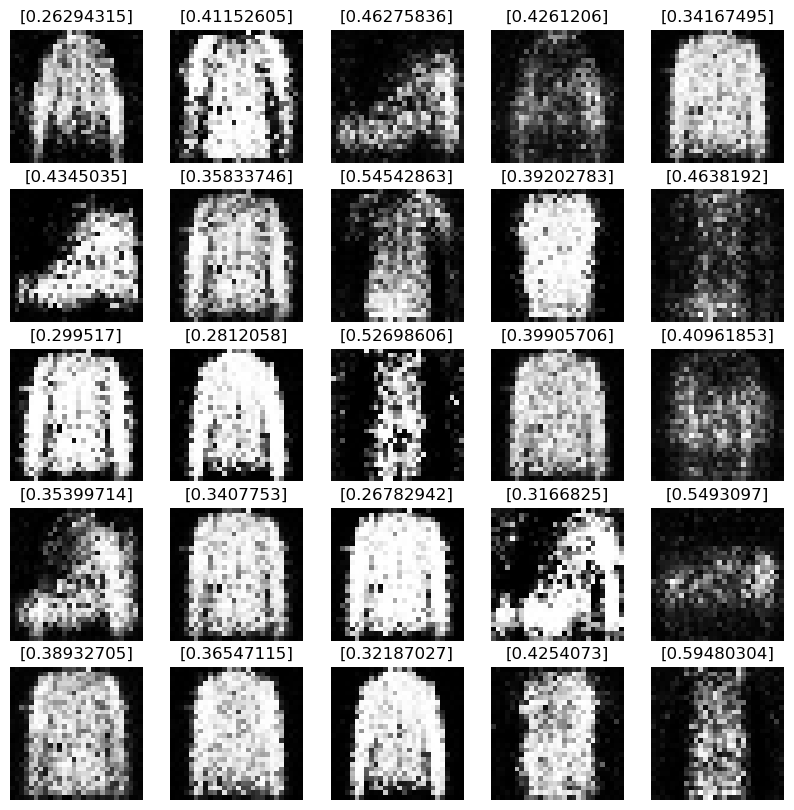

[Epoch 2/200] [D loss: 1.3377] [G loss: 0.8126]
[Epoch 3/200] [D loss: 1.3676] [G loss: 0.7522]
[Epoch 4/200] [D loss: 1.3712] [G loss: 0.7517]
[Epoch 5/200] [D loss: 1.3639] [G loss: 0.7842]
[Epoch 6/200] [D loss: 1.3537] [G loss: 0.8200]
[Epoch 7/200] [D loss: 1.3768] [G loss: 0.7591]
[Epoch 8/200] [D loss: 1.3808] [G loss: 0.7438]
[Epoch 9/200] [D loss: 1.3763] [G loss: 0.7522]
[Epoch 10/200] [D loss: 1.3761] [G loss: 0.7556]


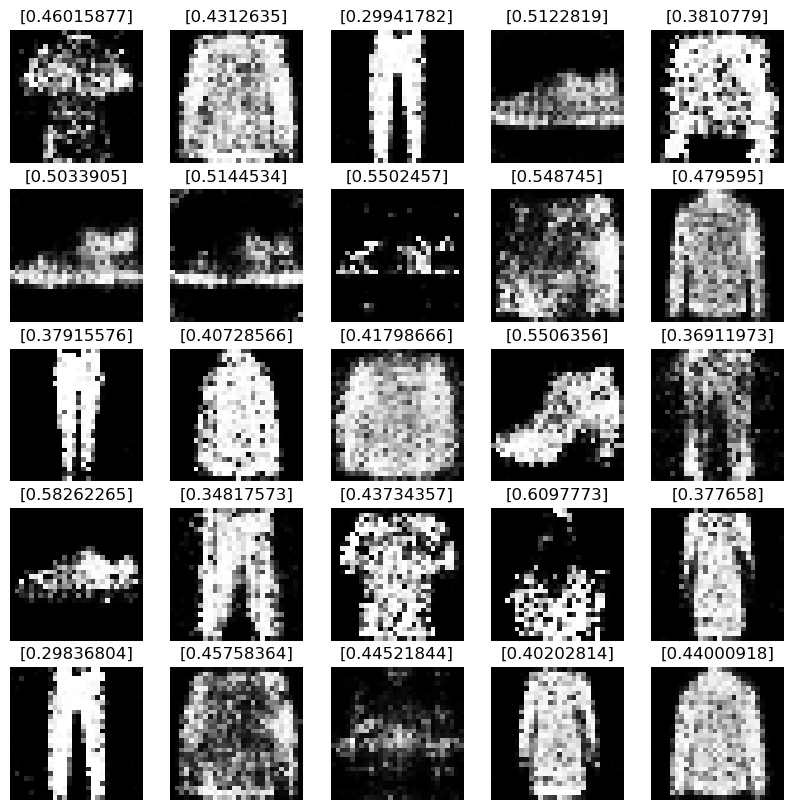

[Epoch 11/200] [D loss: 1.3757] [G loss: 0.7520]
[Epoch 12/200] [D loss: 1.3756] [G loss: 0.7525]
[Epoch 13/200] [D loss: 1.3758] [G loss: 0.7498]
[Epoch 14/200] [D loss: 1.3765] [G loss: 0.7472]
[Epoch 15/200] [D loss: 1.3769] [G loss: 0.7440]
[Epoch 16/200] [D loss: 1.3783] [G loss: 0.7408]
[Epoch 17/200] [D loss: 1.3768] [G loss: 0.7456]
[Epoch 18/200] [D loss: 1.3769] [G loss: 0.7401]
[Epoch 19/200] [D loss: 1.3777] [G loss: 0.7399]
[Epoch 20/200] [D loss: 1.3772] [G loss: 0.7388]


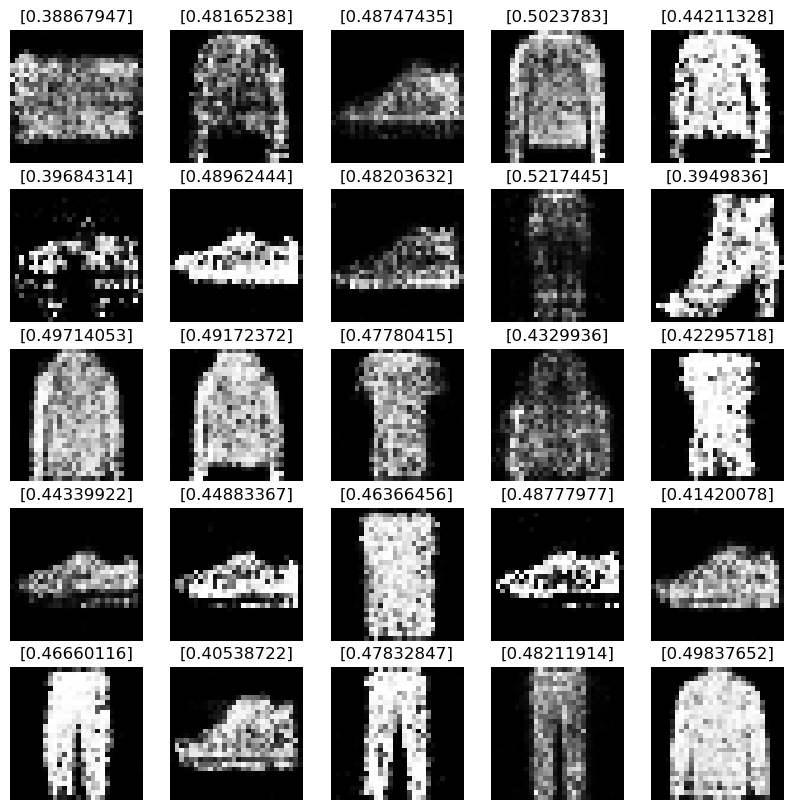

[Epoch 21/200] [D loss: 1.3782] [G loss: 0.7381]
[Epoch 22/200] [D loss: 1.3771] [G loss: 0.7401]
[Epoch 23/200] [D loss: 1.3760] [G loss: 0.7406]
[Epoch 24/200] [D loss: 1.3768] [G loss: 0.7375]
[Epoch 25/200] [D loss: 1.3768] [G loss: 0.7386]
[Epoch 26/200] [D loss: 1.3747] [G loss: 0.7410]
[Epoch 27/200] [D loss: 1.3745] [G loss: 0.7407]
[Epoch 28/200] [D loss: 1.3725] [G loss: 0.7442]
[Epoch 29/200] [D loss: 1.3724] [G loss: 0.7446]
[Epoch 30/200] [D loss: 1.3722] [G loss: 0.7444]


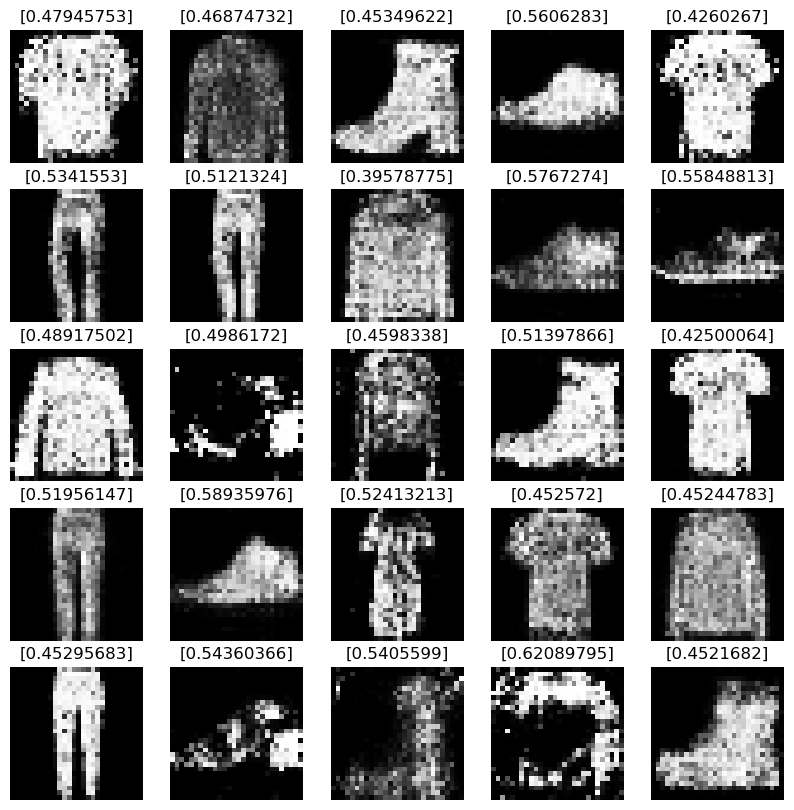

[Epoch 31/200] [D loss: 1.3702] [G loss: 0.7461]
[Epoch 32/200] [D loss: 1.3698] [G loss: 0.7493]
[Epoch 33/200] [D loss: 1.3688] [G loss: 0.7493]
[Epoch 34/200] [D loss: 1.3689] [G loss: 0.7486]
[Epoch 35/200] [D loss: 1.3672] [G loss: 0.7515]
[Epoch 36/200] [D loss: 1.3660] [G loss: 0.7531]
[Epoch 37/200] [D loss: 1.3657] [G loss: 0.7542]
[Epoch 38/200] [D loss: 1.3652] [G loss: 0.7549]
[Epoch 39/200] [D loss: 1.3637] [G loss: 0.7572]
[Epoch 40/200] [D loss: 1.3636] [G loss: 0.7596]


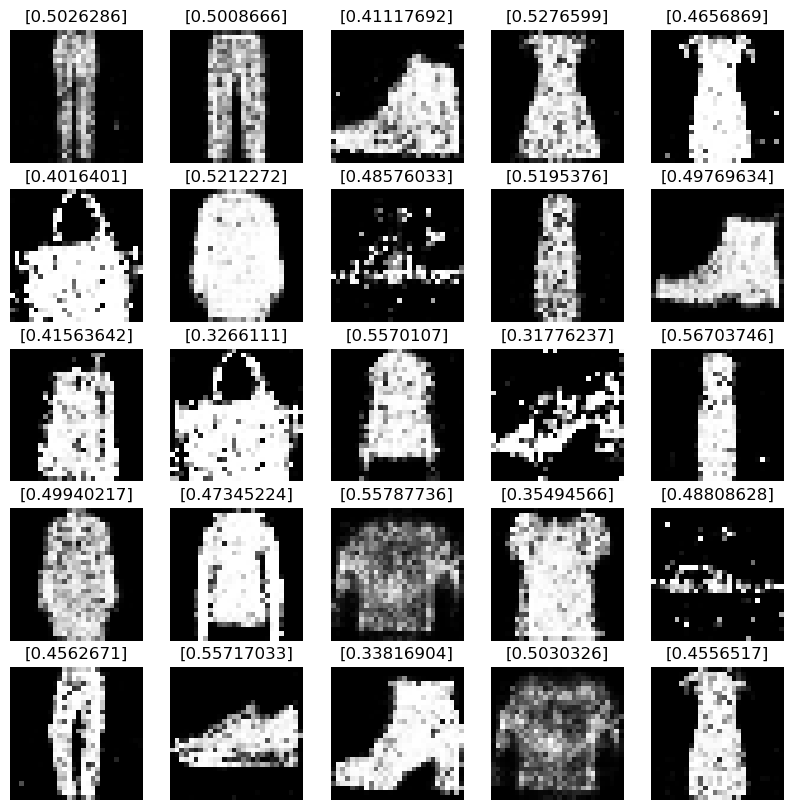

[Epoch 41/200] [D loss: 1.3625] [G loss: 0.7595]
[Epoch 42/200] [D loss: 1.3604] [G loss: 0.7635]
[Epoch 43/200] [D loss: 1.3601] [G loss: 0.7628]
[Epoch 44/200] [D loss: 1.3562] [G loss: 0.7696]
[Epoch 45/200] [D loss: 1.3551] [G loss: 0.7709]
[Epoch 46/200] [D loss: 1.3538] [G loss: 0.7710]
[Epoch 47/200] [D loss: 1.3514] [G loss: 0.7763]
[Epoch 48/200] [D loss: 1.3508] [G loss: 0.7766]
[Epoch 49/200] [D loss: 1.3463] [G loss: 0.7826]
[Epoch 50/200] [D loss: 1.3462] [G loss: 0.7868]


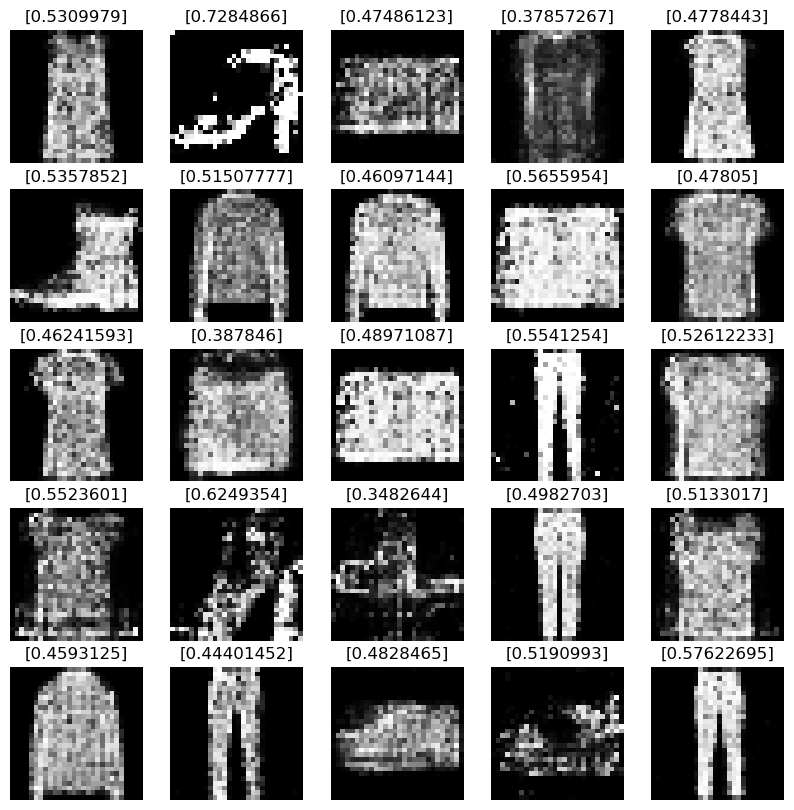

[Epoch 51/200] [D loss: 1.3457] [G loss: 0.7848]
[Epoch 52/200] [D loss: 1.3451] [G loss: 0.7877]
[Epoch 53/200] [D loss: 1.3414] [G loss: 0.7918]
[Epoch 54/200] [D loss: 1.3379] [G loss: 0.7975]
[Epoch 55/200] [D loss: 1.3376] [G loss: 0.7998]
[Epoch 56/200] [D loss: 1.3354] [G loss: 0.8038]
[Epoch 57/200] [D loss: 1.3336] [G loss: 0.8058]
[Epoch 58/200] [D loss: 1.3323] [G loss: 0.8063]
[Epoch 59/200] [D loss: 1.3291] [G loss: 0.8120]
[Epoch 60/200] [D loss: 1.3283] [G loss: 0.8137]


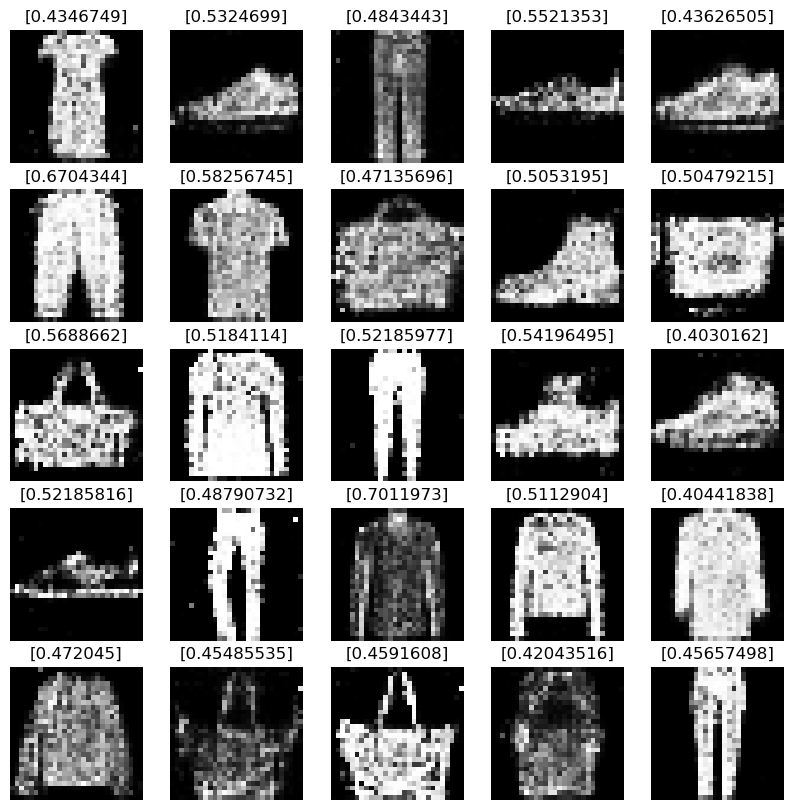

[Epoch 61/200] [D loss: 1.3253] [G loss: 0.8199]
[Epoch 62/200] [D loss: 1.3253] [G loss: 0.8193]
[Epoch 63/200] [D loss: 1.3226] [G loss: 0.8227]
[Epoch 64/200] [D loss: 1.3189] [G loss: 0.8280]
[Epoch 65/200] [D loss: 1.3195] [G loss: 0.8296]
[Epoch 66/200] [D loss: 1.3186] [G loss: 0.8295]
[Epoch 67/200] [D loss: 1.3156] [G loss: 0.8342]
[Epoch 68/200] [D loss: 1.3126] [G loss: 0.8403]
[Epoch 69/200] [D loss: 1.3103] [G loss: 0.8419]
[Epoch 70/200] [D loss: 1.3101] [G loss: 0.8438]


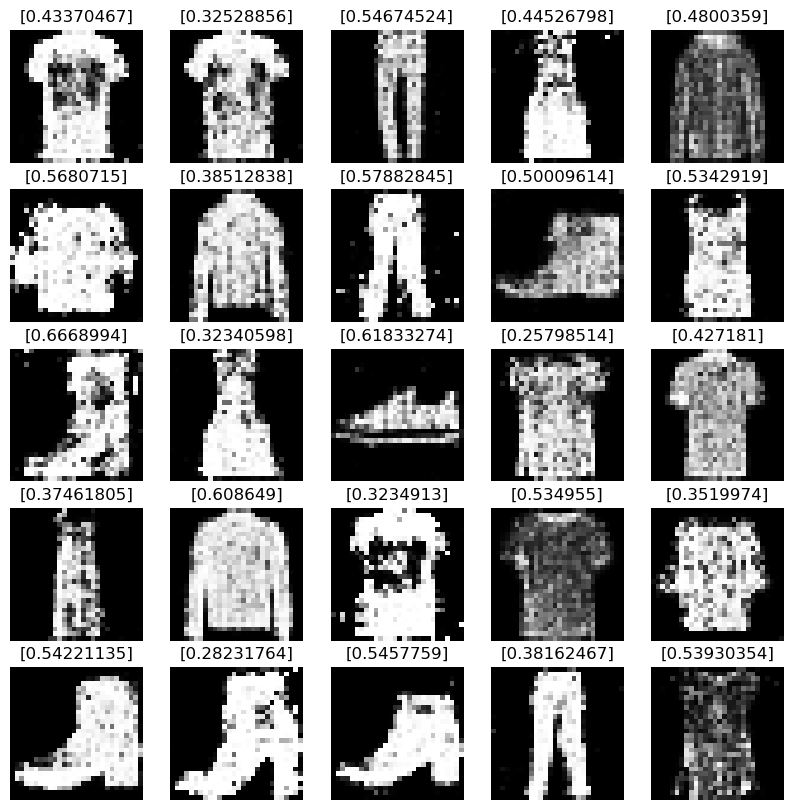

[Epoch 71/200] [D loss: 1.3064] [G loss: 0.8476]
[Epoch 72/200] [D loss: 1.3032] [G loss: 0.8529]
[Epoch 73/200] [D loss: 1.3039] [G loss: 0.8540]
[Epoch 74/200] [D loss: 1.3010] [G loss: 0.8575]
[Epoch 75/200] [D loss: 1.2974] [G loss: 0.8624]
[Epoch 76/200] [D loss: 1.2961] [G loss: 0.8652]
[Epoch 77/200] [D loss: 1.2964] [G loss: 0.8666]
[Epoch 78/200] [D loss: 1.2933] [G loss: 0.8709]
[Epoch 79/200] [D loss: 1.2897] [G loss: 0.8759]
[Epoch 80/200] [D loss: 1.2891] [G loss: 0.8774]


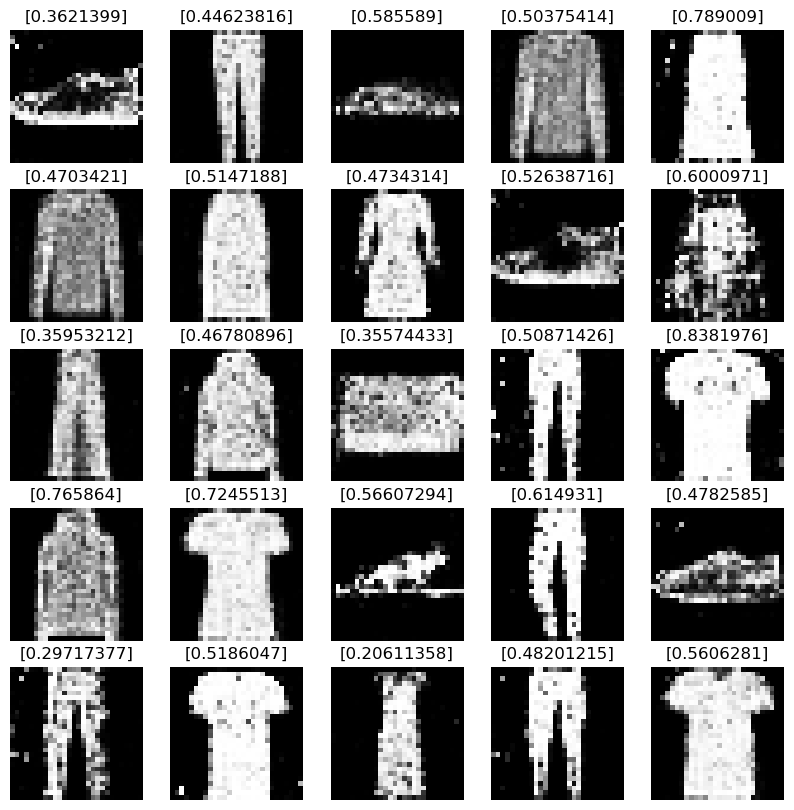

[Epoch 81/200] [D loss: 1.2892] [G loss: 0.8774]
[Epoch 82/200] [D loss: 1.2867] [G loss: 0.8831]
[Epoch 83/200] [D loss: 1.2857] [G loss: 0.8843]
[Epoch 84/200] [D loss: 1.2810] [G loss: 0.8912]
[Epoch 85/200] [D loss: 1.2803] [G loss: 0.8925]
[Epoch 86/200] [D loss: 1.2813] [G loss: 0.8926]
[Epoch 87/200] [D loss: 1.2737] [G loss: 0.9014]
[Epoch 88/200] [D loss: 1.2728] [G loss: 0.9058]
[Epoch 89/200] [D loss: 1.2757] [G loss: 0.9025]
[Epoch 90/200] [D loss: 1.2709] [G loss: 0.9066]


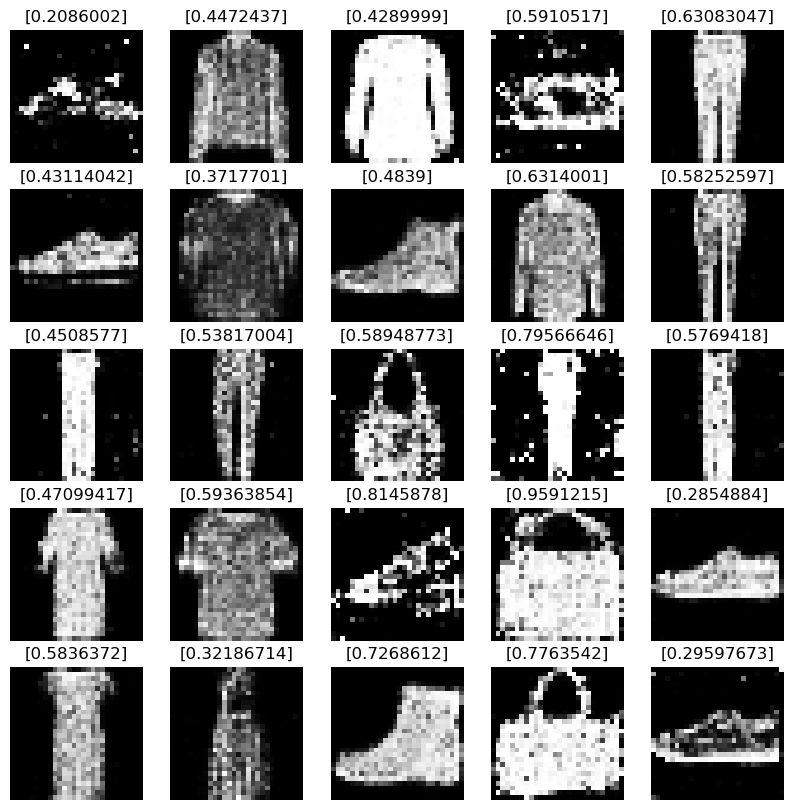

[Epoch 91/200] [D loss: 1.2687] [G loss: 0.9105]
[Epoch 92/200] [D loss: 1.2674] [G loss: 0.9168]
[Epoch 93/200] [D loss: 1.2646] [G loss: 0.9200]
[Epoch 94/200] [D loss: 1.2667] [G loss: 0.9163]
[Epoch 95/200] [D loss: 1.2632] [G loss: 0.9214]
[Epoch 96/200] [D loss: 1.2636] [G loss: 0.9232]
[Epoch 97/200] [D loss: 1.2562] [G loss: 0.9319]
[Epoch 98/200] [D loss: 1.2573] [G loss: 0.9323]
[Epoch 99/200] [D loss: 1.2556] [G loss: 0.9348]
[Epoch 100/200] [D loss: 1.2528] [G loss: 0.9395]


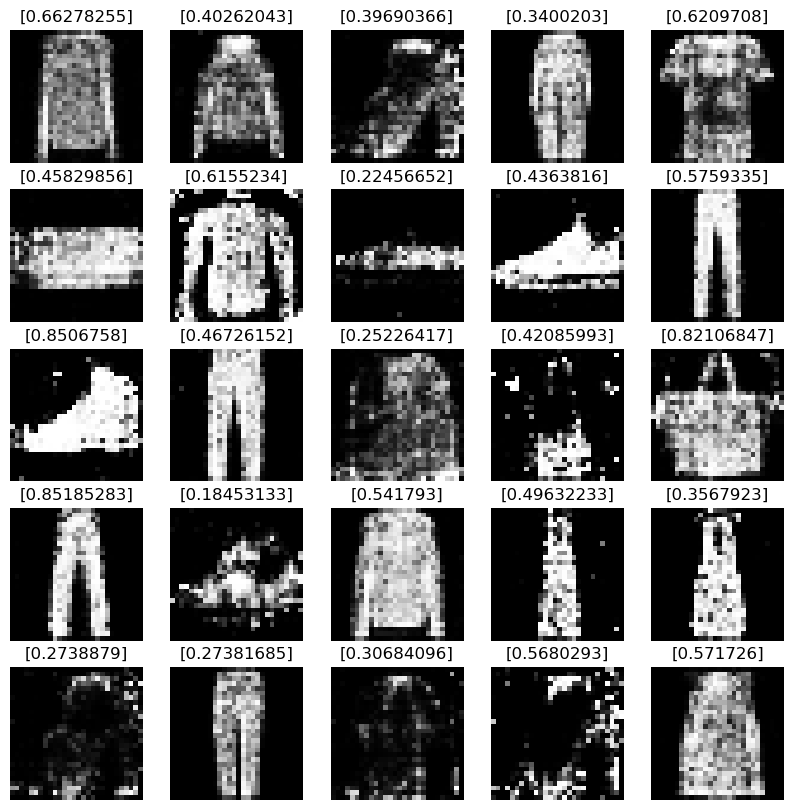

[Epoch 101/200] [D loss: 1.2522] [G loss: 0.9391]
[Epoch 102/200] [D loss: 1.2498] [G loss: 0.9438]
[Epoch 103/200] [D loss: 1.2501] [G loss: 0.9461]
[Epoch 104/200] [D loss: 1.2440] [G loss: 0.9541]
[Epoch 105/200] [D loss: 1.2437] [G loss: 0.9541]
[Epoch 106/200] [D loss: 1.2399] [G loss: 0.9591]
[Epoch 107/200] [D loss: 1.2390] [G loss: 0.9633]
[Epoch 108/200] [D loss: 1.2379] [G loss: 0.9653]
[Epoch 109/200] [D loss: 1.2280] [G loss: 0.9765]
[Epoch 110/200] [D loss: 1.2256] [G loss: 0.9800]


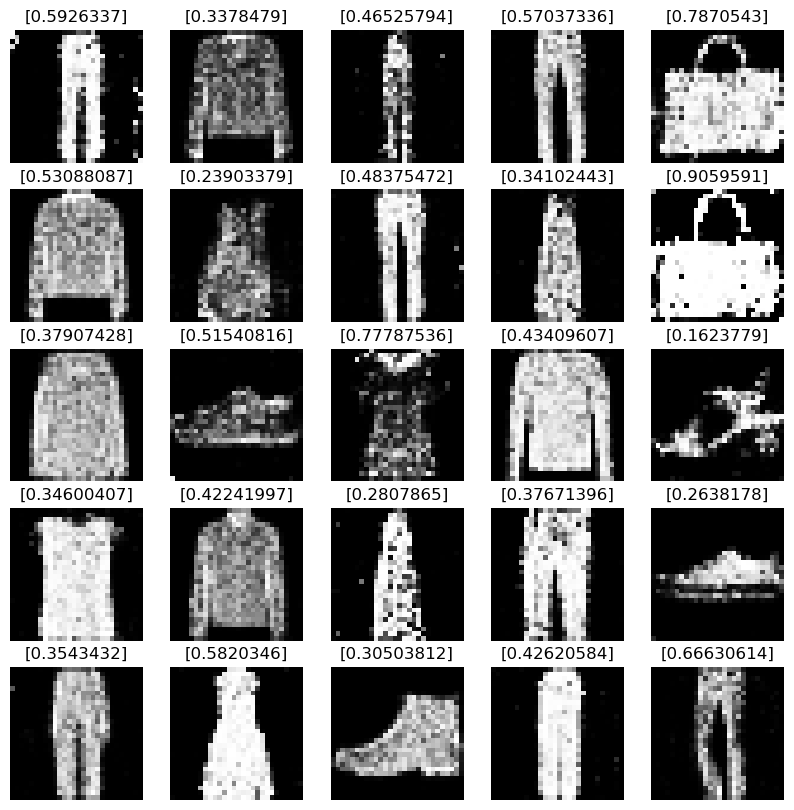

[Epoch 111/200] [D loss: 1.2343] [G loss: 0.9716]
[Epoch 112/200] [D loss: 1.2299] [G loss: 0.9759]
[Epoch 113/200] [D loss: 1.2276] [G loss: 0.9787]
[Epoch 114/200] [D loss: 1.2298] [G loss: 0.9822]
[Epoch 115/200] [D loss: 1.2240] [G loss: 0.9878]
[Epoch 116/200] [D loss: 1.2222] [G loss: 0.9906]
[Epoch 117/200] [D loss: 1.2189] [G loss: 0.9948]
[Epoch 118/200] [D loss: 1.2184] [G loss: 1.0000]
[Epoch 119/200] [D loss: 1.2171] [G loss: 1.0016]
[Epoch 120/200] [D loss: 1.2131] [G loss: 1.0036]


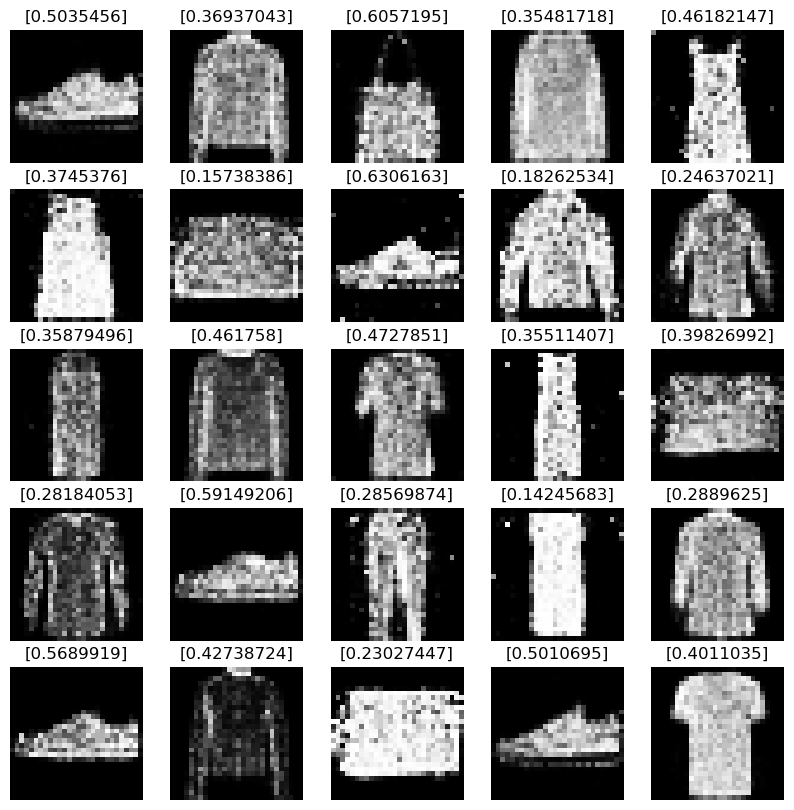

[Epoch 121/200] [D loss: 1.2179] [G loss: 1.0039]
[Epoch 122/200] [D loss: 1.2140] [G loss: 1.0076]
[Epoch 123/200] [D loss: 1.2086] [G loss: 1.0172]
[Epoch 124/200] [D loss: 1.2093] [G loss: 1.0163]
[Epoch 125/200] [D loss: 1.2112] [G loss: 1.0137]
[Epoch 126/200] [D loss: 1.2098] [G loss: 1.0190]
[Epoch 127/200] [D loss: 1.2067] [G loss: 1.0214]
[Epoch 128/200] [D loss: 1.2019] [G loss: 1.0303]
[Epoch 129/200] [D loss: 1.2041] [G loss: 1.0268]
[Epoch 130/200] [D loss: 1.1956] [G loss: 1.0325]


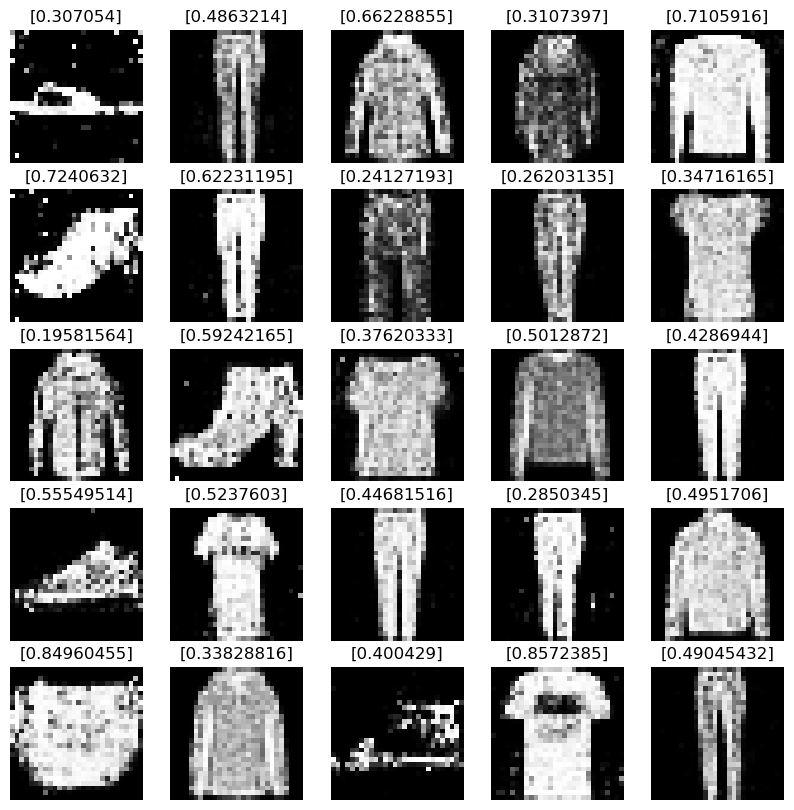

[Epoch 131/200] [D loss: 1.1984] [G loss: 1.0368]
[Epoch 132/200] [D loss: 1.1954] [G loss: 1.0386]
[Epoch 133/200] [D loss: 1.1942] [G loss: 1.0432]
[Epoch 134/200] [D loss: 1.1955] [G loss: 1.0431]
[Epoch 135/200] [D loss: 1.1942] [G loss: 1.0463]
[Epoch 136/200] [D loss: 1.1893] [G loss: 1.0497]
[Epoch 137/200] [D loss: 1.1876] [G loss: 1.0517]
[Epoch 138/200] [D loss: 1.1815] [G loss: 1.0629]
[Epoch 139/200] [D loss: 1.1856] [G loss: 1.0576]
[Epoch 140/200] [D loss: 1.1842] [G loss: 1.0605]


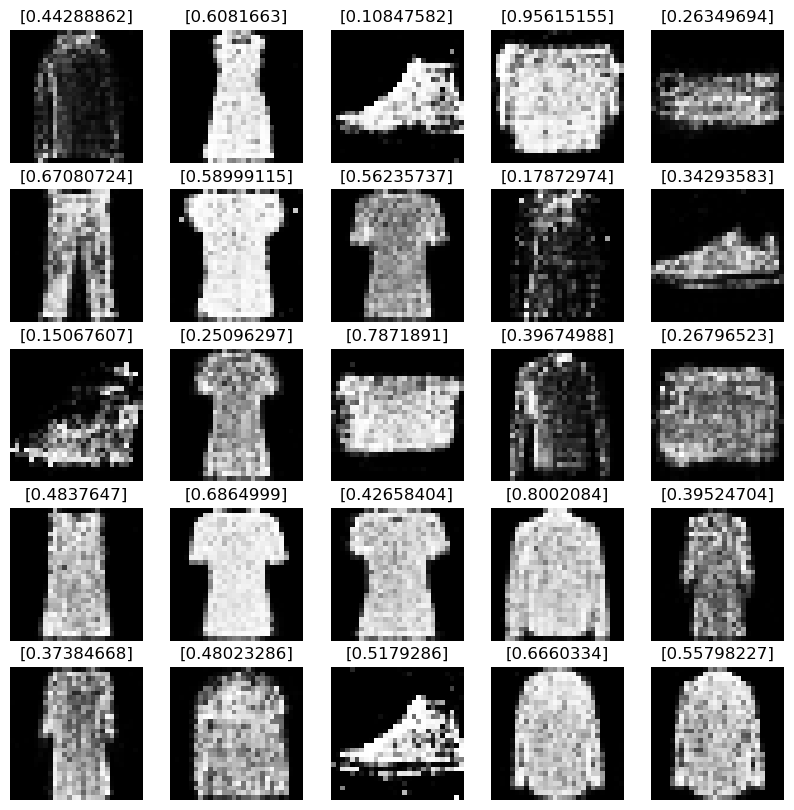

[Epoch 141/200] [D loss: 1.1812] [G loss: 1.0652]
[Epoch 142/200] [D loss: 1.1805] [G loss: 1.0675]
[Epoch 143/200] [D loss: 1.1765] [G loss: 1.0747]
[Epoch 144/200] [D loss: 1.1751] [G loss: 1.0790]
[Epoch 145/200] [D loss: 1.1733] [G loss: 1.0801]
[Epoch 146/200] [D loss: 1.1743] [G loss: 1.0794]
[Epoch 147/200] [D loss: 1.1733] [G loss: 1.0800]
[Epoch 148/200] [D loss: 1.1677] [G loss: 1.0875]
[Epoch 149/200] [D loss: 1.1647] [G loss: 1.0923]
[Epoch 150/200] [D loss: 1.1687] [G loss: 1.0922]


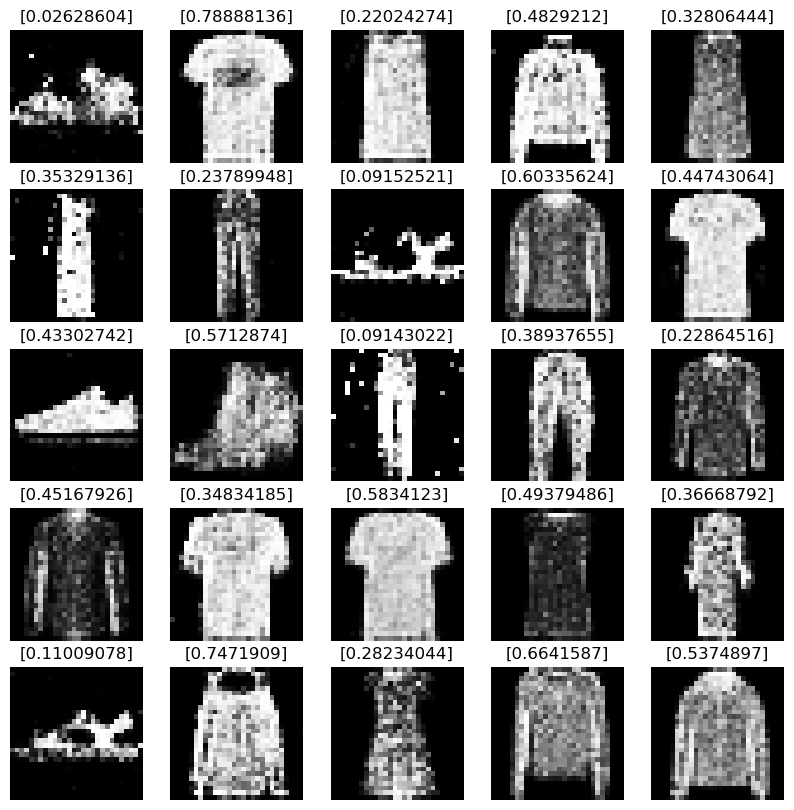

[Epoch 151/200] [D loss: 1.1660] [G loss: 1.0955]
[Epoch 152/200] [D loss: 1.1627] [G loss: 1.0998]
[Epoch 153/200] [D loss: 1.1627] [G loss: 1.1050]
[Epoch 154/200] [D loss: 1.1578] [G loss: 1.1056]
[Epoch 155/200] [D loss: 1.1582] [G loss: 1.1083]
[Epoch 156/200] [D loss: 1.1574] [G loss: 1.1104]
[Epoch 157/200] [D loss: 1.1534] [G loss: 1.1156]
[Epoch 158/200] [D loss: 1.1539] [G loss: 1.1172]
[Epoch 159/200] [D loss: 1.1481] [G loss: 1.1237]
[Epoch 160/200] [D loss: 1.1464] [G loss: 1.1293]


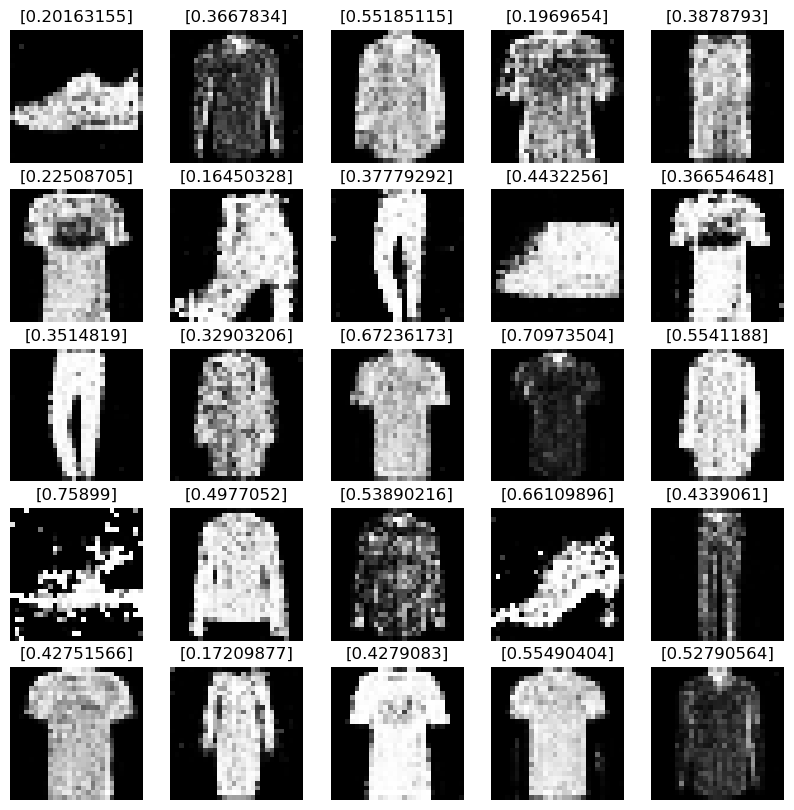

[Epoch 161/200] [D loss: 1.1479] [G loss: 1.1245]
[Epoch 162/200] [D loss: 1.1378] [G loss: 1.1404]
[Epoch 163/200] [D loss: 1.1430] [G loss: 1.1355]
[Epoch 164/200] [D loss: 1.1390] [G loss: 1.1419]
[Epoch 165/200] [D loss: 1.1417] [G loss: 1.1404]
[Epoch 166/200] [D loss: 1.1422] [G loss: 1.1378]
[Epoch 167/200] [D loss: 1.1396] [G loss: 1.1392]
[Epoch 168/200] [D loss: 1.1376] [G loss: 1.1500]
[Epoch 169/200] [D loss: 1.1371] [G loss: 1.1484]
[Epoch 170/200] [D loss: 1.1355] [G loss: 1.1529]


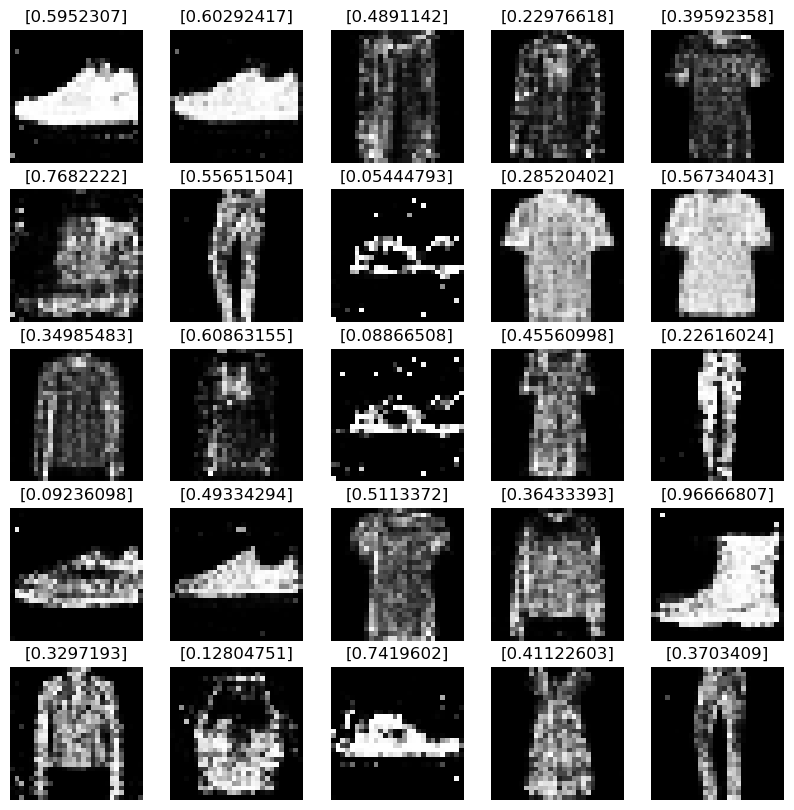

[Epoch 171/200] [D loss: 1.1329] [G loss: 1.1551]
[Epoch 172/200] [D loss: 1.1302] [G loss: 1.1570]
[Epoch 173/200] [D loss: 1.1292] [G loss: 1.1635]
[Epoch 174/200] [D loss: 1.1329] [G loss: 1.1586]
[Epoch 175/200] [D loss: 1.1294] [G loss: 1.1646]
[Epoch 176/200] [D loss: 1.1288] [G loss: 1.1653]
[Epoch 177/200] [D loss: 1.1219] [G loss: 1.1720]
[Epoch 178/200] [D loss: 1.1222] [G loss: 1.1746]
[Epoch 179/200] [D loss: 1.1236] [G loss: 1.1757]
[Epoch 180/200] [D loss: 1.1235] [G loss: 1.1724]


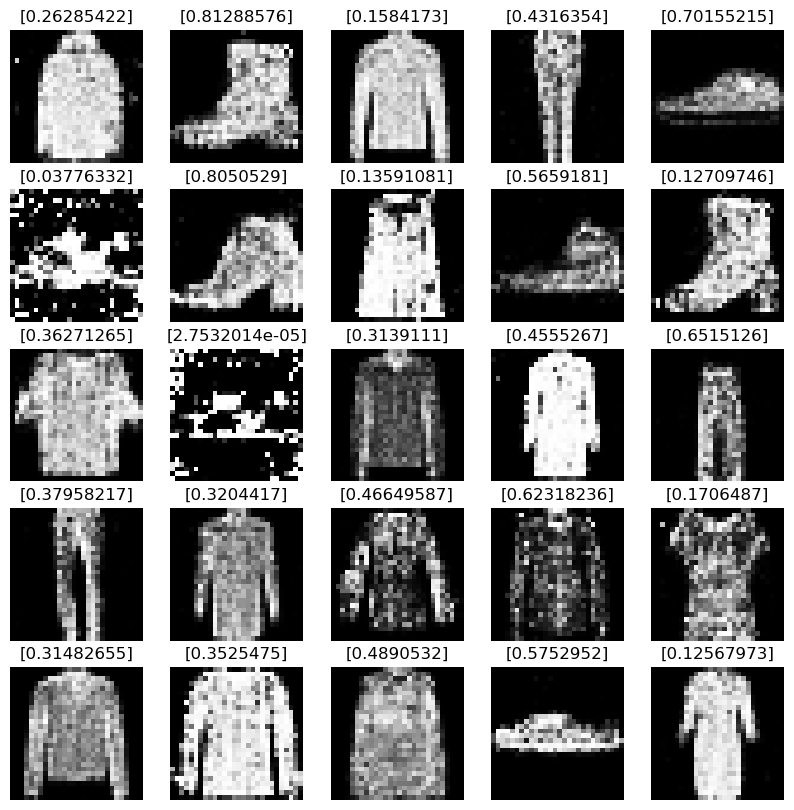

[Epoch 181/200] [D loss: 1.1224] [G loss: 1.1765]
[Epoch 182/200] [D loss: 1.1201] [G loss: 1.1817]
[Epoch 183/200] [D loss: 1.1194] [G loss: 1.1826]
[Epoch 184/200] [D loss: 1.1179] [G loss: 1.1883]
[Epoch 185/200] [D loss: 1.1135] [G loss: 1.1958]
[Epoch 186/200] [D loss: 1.1135] [G loss: 1.1947]
[Epoch 187/200] [D loss: 1.1152] [G loss: 1.1883]
[Epoch 188/200] [D loss: 1.1099] [G loss: 1.1956]
[Epoch 189/200] [D loss: 1.1117] [G loss: 1.2031]
[Epoch 190/200] [D loss: 1.1110] [G loss: 1.2055]


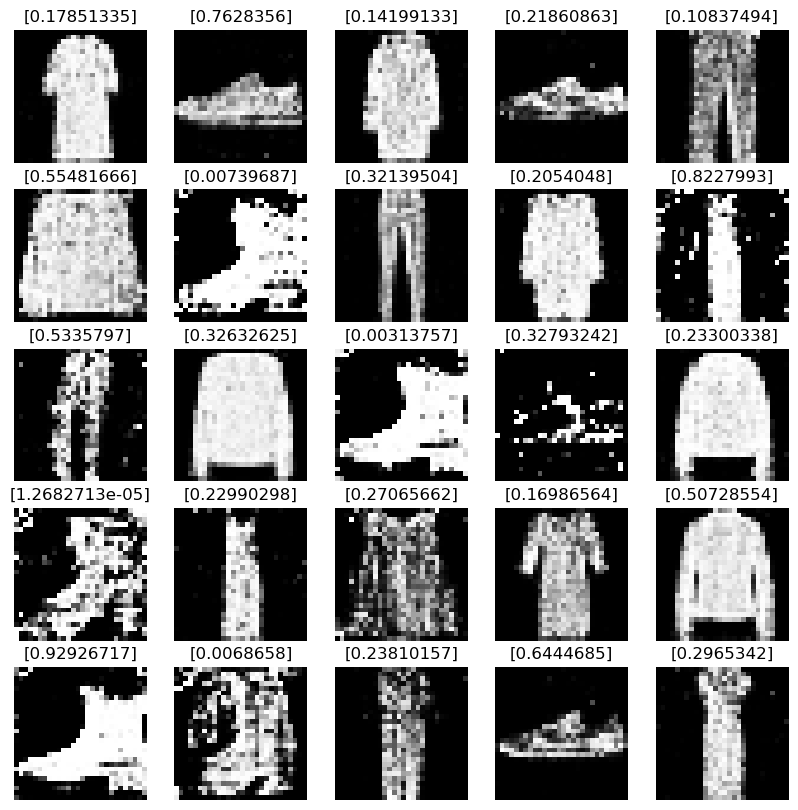

[Epoch 191/200] [D loss: 1.1057] [G loss: 1.2049]
[Epoch 192/200] [D loss: 1.1024] [G loss: 1.2100]
[Epoch 193/200] [D loss: 1.1061] [G loss: 1.2072]
[Epoch 194/200] [D loss: 1.1049] [G loss: 1.2139]
[Epoch 195/200] [D loss: 1.1005] [G loss: 1.2153]
[Epoch 196/200] [D loss: 1.0979] [G loss: 1.2177]
[Epoch 197/200] [D loss: 1.0971] [G loss: 1.2253]
[Epoch 198/200] [D loss: 1.1021] [G loss: 1.2178]
[Epoch 199/200] [D loss: 1.1014] [G loss: 1.2182]
[Epoch 200/200] [D loss: 1.1006] [G loss: 1.2254]


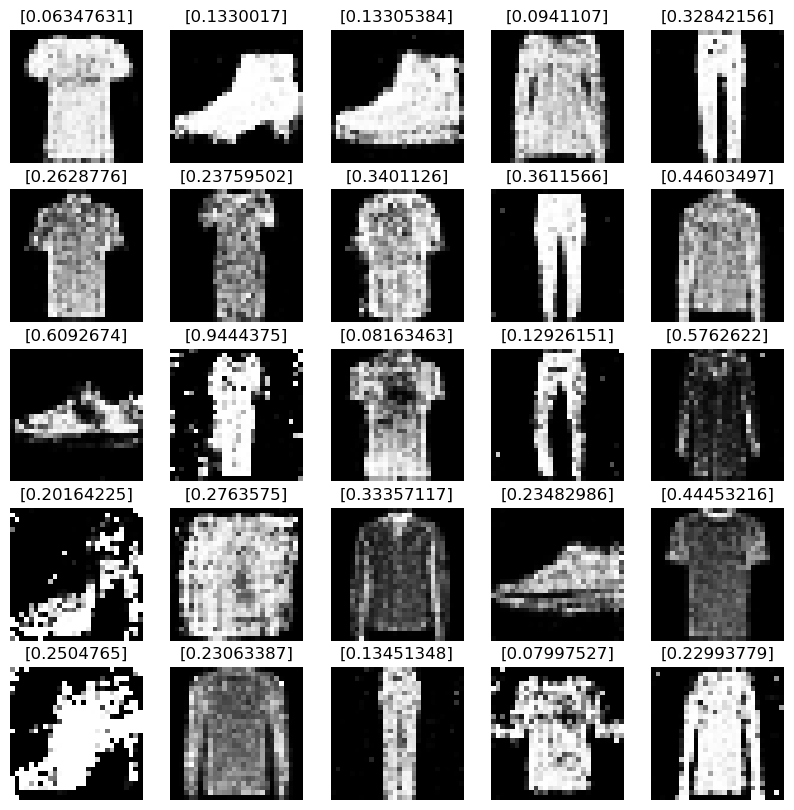

In [48]:
D_loss_list, G_loss_list = [], []

# training loop
for epoch in range(1, N_EPOCHS + 1): 
    
    D_loss_epoch, G_loss_epoch = 0, 0

    for index, (real_image, _) in enumerate(train_loader):
        
        discriminator.train()
        generator.train()

        D_optimizer.zero_grad()
        real_image = real_image.to(DEVICE)
        real_target = torch.ones(real_image.size(0), 1).to(DEVICE)
        fake_target = torch.zeros(real_image.size(0), 1).to(DEVICE)

        # train discriminator on real images
        D_real_loss = adversarial_loss(discriminator(real_image), real_target)

        # noise sampling and generate fake images
        noise = torch.randn(real_image.size(0), LATENT_DIM).to(DEVICE)
        fake_image = generator(noise)

        # train discriminator on fake images
        D_fake_loss = adversarial_loss(discriminator(fake_image.detach()), fake_target)

        # backprop and optimize
        D_total_loss = D_real_loss + D_fake_loss
        D_total_loss.backward()
        D_optimizer.step()
        D_loss_epoch += D_total_loss.item()

        # train generator
        G_optimizer.zero_grad()
        fake_image = generator(noise)
        G_loss = adversarial_loss(discriminator(fake_image), real_target)
        G_loss.backward()
        G_optimizer.step()
        G_loss_epoch += G_loss.item()

    D_loss_list.append(D_loss_epoch / len(train_loader))
    G_loss_list.append(G_loss_epoch / len(train_loader))

    print(f"[Epoch {epoch}/{N_EPOCHS}] [D loss: {D_loss_list[-1]:.4f}] [G loss: {G_loss_list[-1]:.4f}]")
    if epoch % 10 == 0 or epoch == 1:
        noise = torch.randn(25, LATENT_DIM).to(DEVICE)
        discriminator.eval()
        generator.eval()

        with torch.no_grad():
            fake_image = generator(noise).detach()
            prediction = discriminator(fake_image).detach()

            fake_image = fake_image.cpu().numpy()
            prediction = prediction.cpu().numpy()

            plt.figure(figsize=(10, 10))
            for i in range(25):
                plt.subplot(5, 5, i + 1)
                plt.imshow(fake_image[i].squeeze(), cmap='gray')
                plt.title(prediction[i])
                plt.axis('off')
            plt.show()

# Plot

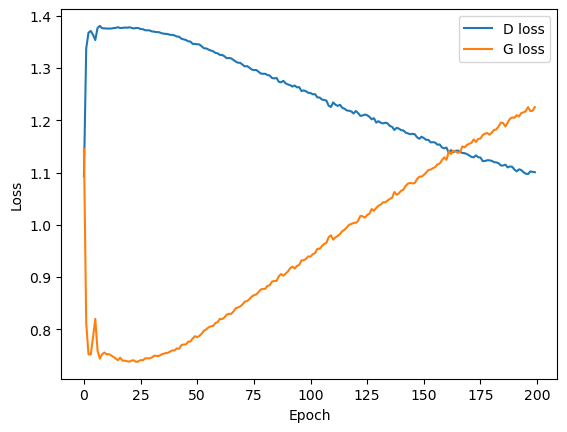

Model saved!


In [49]:
# loss plot
plt.plot(D_loss_list, label='D loss')
plt.plot(G_loss_list, label='G loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# save the model
os.makedirs('saved_models', exist_ok=True)
torch.save(generator.state_dict(), 'saved_models/generator-1.pth')
torch.save(discriminator.state_dict(), 'saved_models/discriminator-1.pth')
print('Model saved!')



# load model

C:\Users\S237442\AppData\Local\Temp\ipykernel_50252\2857717388.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load('saved_models/generat

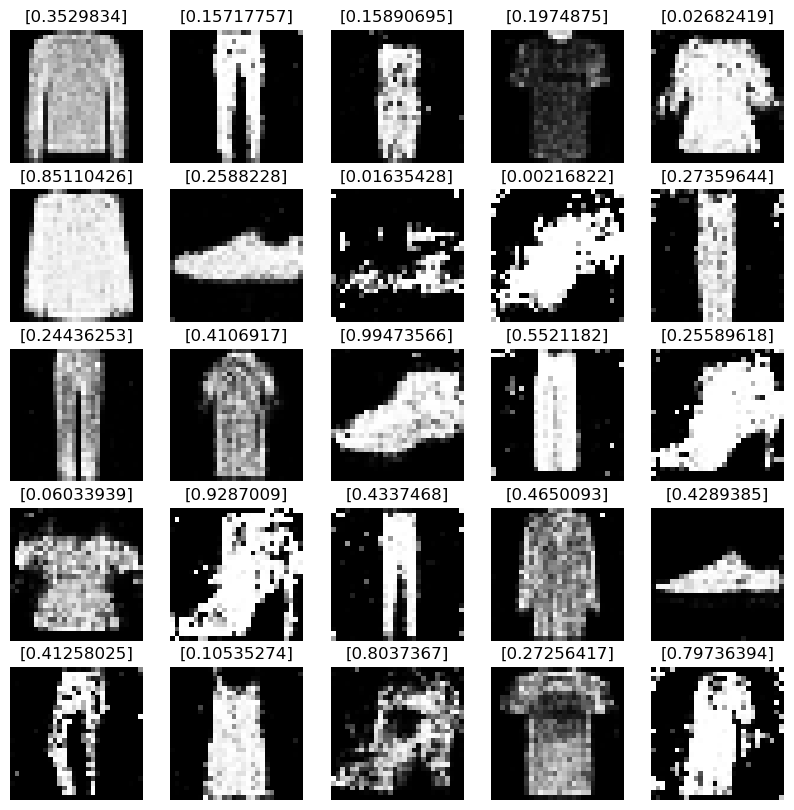

In [53]:
# load the model
generator = Generator().to(DEVICE)
discriminator = Discriminator().to(DEVICE)
generator.load_state_dict(torch.load('saved_models/generator-1.pth'))
discriminator.load_state_dict(torch.load('saved_models/discriminator-1.pth'))
generator.eval()
discriminator.eval()

# generate some images
noise = torch.randn(25, LATENT_DIM).to(DEVICE)
with torch.no_grad():
    fake_image = generator(noise).detach()
    prediction = discriminator(fake_image).detach()

    fake_image = fake_image.cpu().numpy()
    prediction = prediction.cpu().numpy()

    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(fake_image[i].squeeze(), cmap='gray')
        plt.title(prediction[i])
        plt.axis('off')
    plt.show()

# Second training

[Epoch 1/200] [D loss: 1.0540] [G loss: 3.2452]


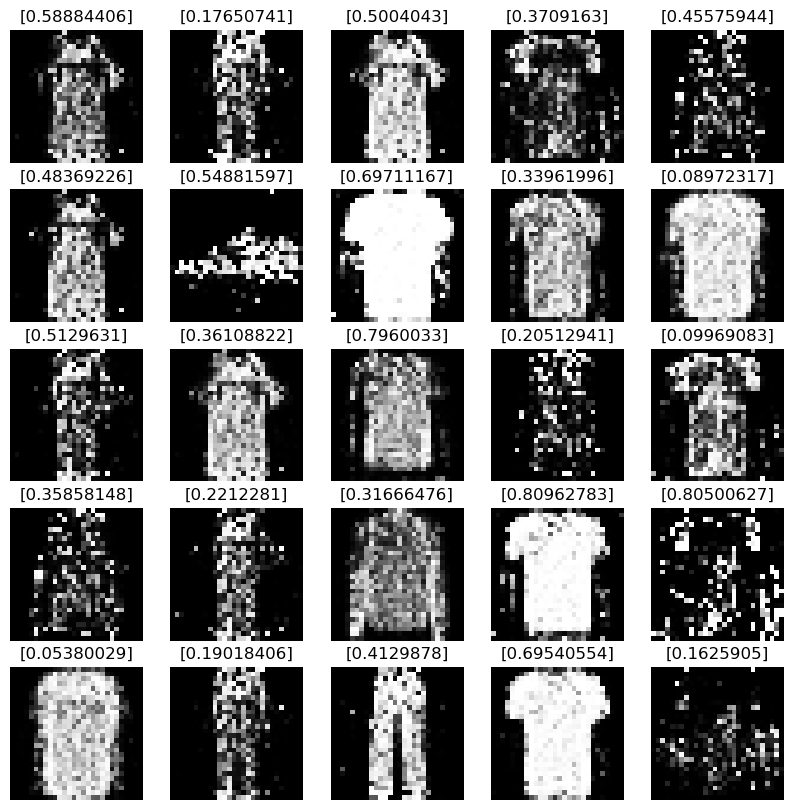

[Epoch 2/200] [D loss: 0.9533] [G loss: 4.6387]
[Epoch 3/200] [D loss: 0.9802] [G loss: 4.5991]
[Epoch 4/200] [D loss: 0.9807] [G loss: 4.4259]
[Epoch 5/200] [D loss: 0.9708] [G loss: 4.4249]
[Epoch 6/200] [D loss: 0.9525] [G loss: 4.2923]
[Epoch 7/200] [D loss: 0.8909] [G loss: 4.4597]
[Epoch 8/200] [D loss: 0.8601] [G loss: 4.5846]
[Epoch 9/200] [D loss: 0.8507] [G loss: 4.5755]
[Epoch 10/200] [D loss: 0.8306] [G loss: 4.6613]


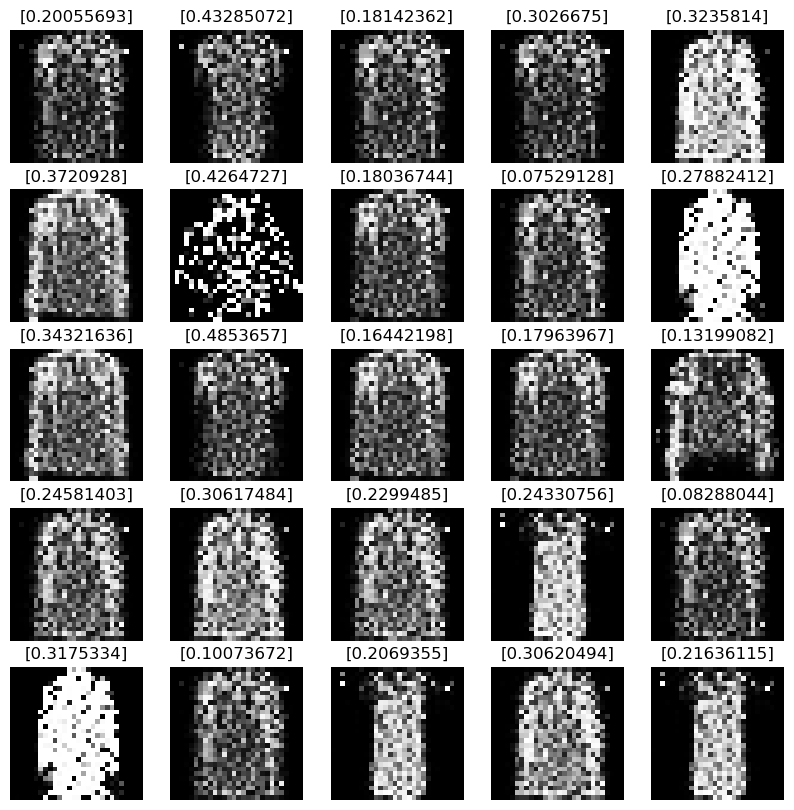

[Epoch 11/200] [D loss: 0.8061] [G loss: 4.7088]
[Epoch 12/200] [D loss: 0.7754] [G loss: 4.7552]
[Epoch 13/200] [D loss: 0.7953] [G loss: 4.7673]
[Epoch 14/200] [D loss: 0.7858] [G loss: 4.5809]
[Epoch 15/200] [D loss: 0.7925] [G loss: 4.5587]
[Epoch 16/200] [D loss: 0.7731] [G loss: 4.8248]
[Epoch 17/200] [D loss: 0.7528] [G loss: 4.7343]
[Epoch 18/200] [D loss: 0.7622] [G loss: 4.7493]
[Epoch 19/200] [D loss: 0.7185] [G loss: 4.8147]
[Epoch 20/200] [D loss: 0.7789] [G loss: 4.6333]


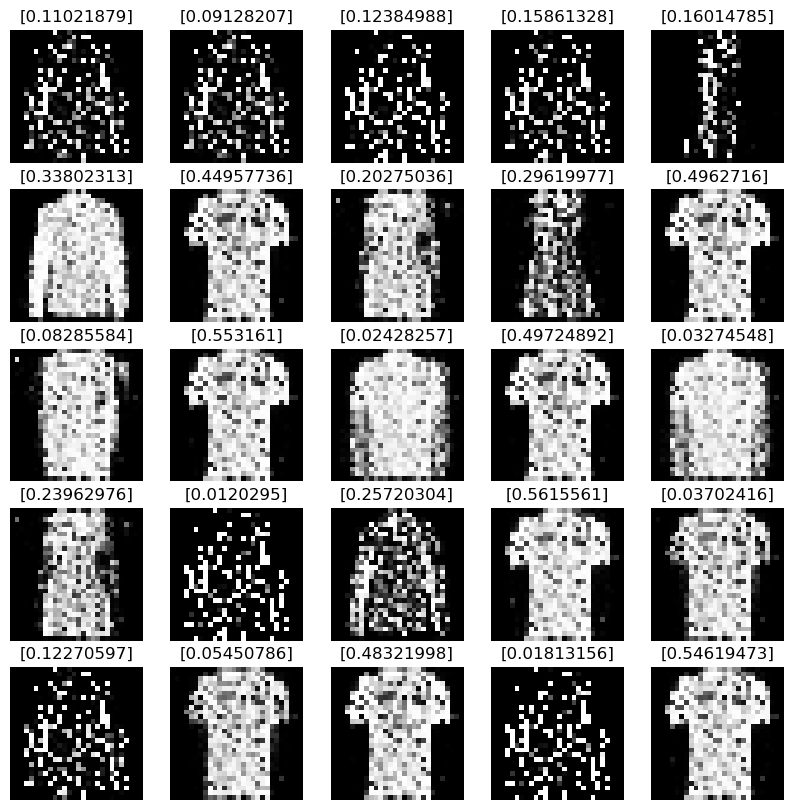

[Epoch 21/200] [D loss: 0.7191] [G loss: 4.7981]
[Epoch 22/200] [D loss: 0.7213] [G loss: 4.5499]
[Epoch 23/200] [D loss: 0.7438] [G loss: 4.4398]
[Epoch 24/200] [D loss: 0.7053] [G loss: 4.5803]
[Epoch 25/200] [D loss: 0.7381] [G loss: 4.5268]
[Epoch 26/200] [D loss: 0.7351] [G loss: 4.6172]
[Epoch 27/200] [D loss: 0.7530] [G loss: 4.5010]
[Epoch 28/200] [D loss: 0.7505] [G loss: 4.4572]
[Epoch 29/200] [D loss: 0.7347] [G loss: 4.3482]
[Epoch 30/200] [D loss: 0.7114] [G loss: 4.5749]


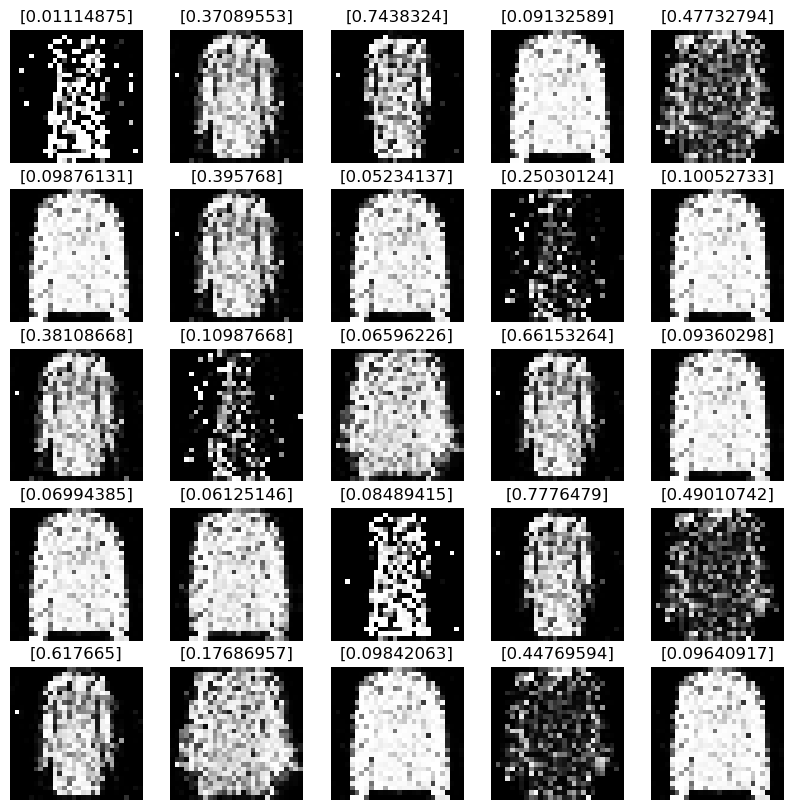

[Epoch 31/200] [D loss: 0.7200] [G loss: 4.5599]
[Epoch 32/200] [D loss: 0.7391] [G loss: 4.3694]
[Epoch 33/200] [D loss: 0.6976] [G loss: 4.4881]
[Epoch 34/200] [D loss: 0.7456] [G loss: 4.2725]
[Epoch 35/200] [D loss: 0.7417] [G loss: 4.4344]
[Epoch 36/200] [D loss: 0.7357] [G loss: 4.4591]
[Epoch 37/200] [D loss: 0.7568] [G loss: 4.2231]
[Epoch 38/200] [D loss: 0.7134] [G loss: 4.3921]
[Epoch 39/200] [D loss: 0.7820] [G loss: 4.2836]
[Epoch 40/200] [D loss: 0.7628] [G loss: 4.1475]


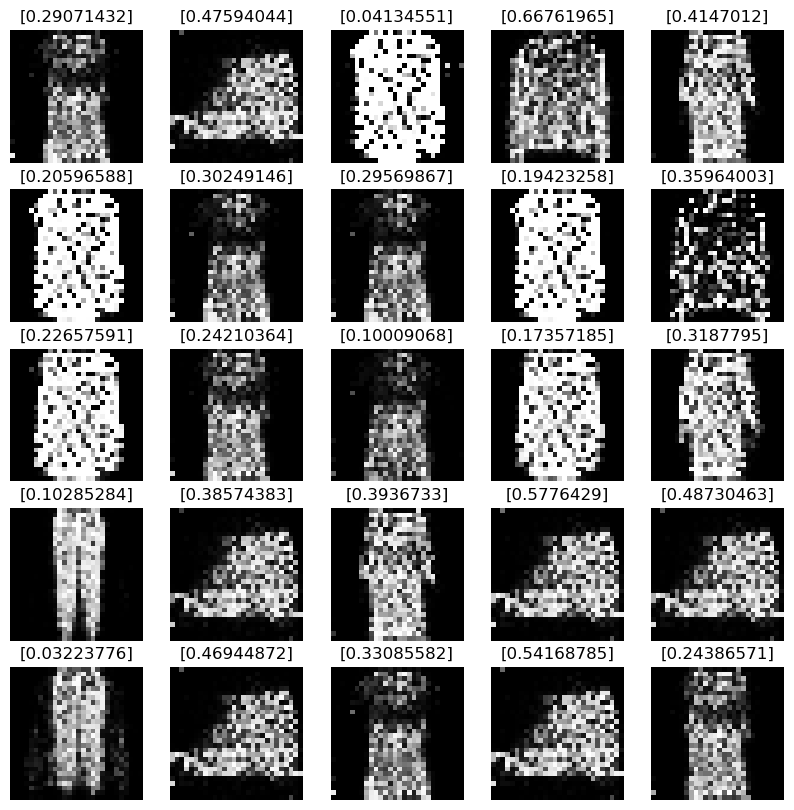

[Epoch 41/200] [D loss: 0.7594] [G loss: 4.3798]
[Epoch 42/200] [D loss: 0.7027] [G loss: 4.3520]
[Epoch 43/200] [D loss: 0.7236] [G loss: 4.1850]
[Epoch 44/200] [D loss: 0.7220] [G loss: 4.5739]
[Epoch 45/200] [D loss: 0.7893] [G loss: 4.3022]
[Epoch 46/200] [D loss: 0.8058] [G loss: 4.2132]
[Epoch 47/200] [D loss: 0.8058] [G loss: 4.0638]
[Epoch 48/200] [D loss: 0.8441] [G loss: 4.0141]
[Epoch 49/200] [D loss: 0.7925] [G loss: 3.9417]
[Epoch 50/200] [D loss: 0.7916] [G loss: 4.2174]


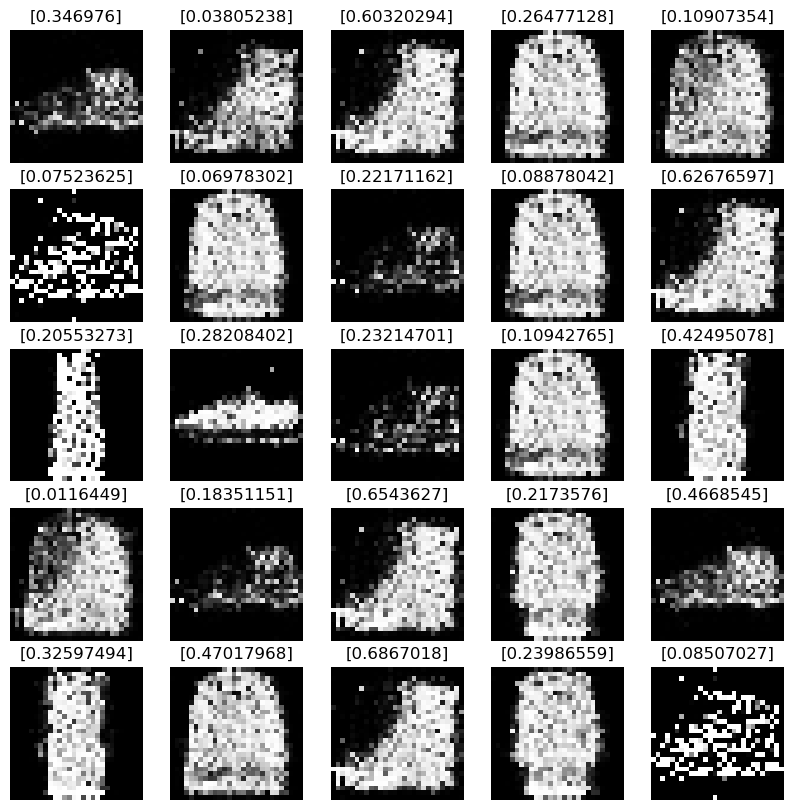

[Epoch 51/200] [D loss: 0.7667] [G loss: 4.2663]
[Epoch 52/200] [D loss: 0.7943] [G loss: 4.1379]
[Epoch 53/200] [D loss: 0.8169] [G loss: 3.9715]
[Epoch 54/200] [D loss: 0.8112] [G loss: 3.9958]
[Epoch 55/200] [D loss: 0.8176] [G loss: 3.9391]
[Epoch 56/200] [D loss: 0.8221] [G loss: 4.1025]
[Epoch 57/200] [D loss: 0.7777] [G loss: 3.9479]
[Epoch 58/200] [D loss: 0.7878] [G loss: 4.0896]
[Epoch 59/200] [D loss: 0.7842] [G loss: 4.0141]
[Epoch 60/200] [D loss: 0.7875] [G loss: 4.0272]


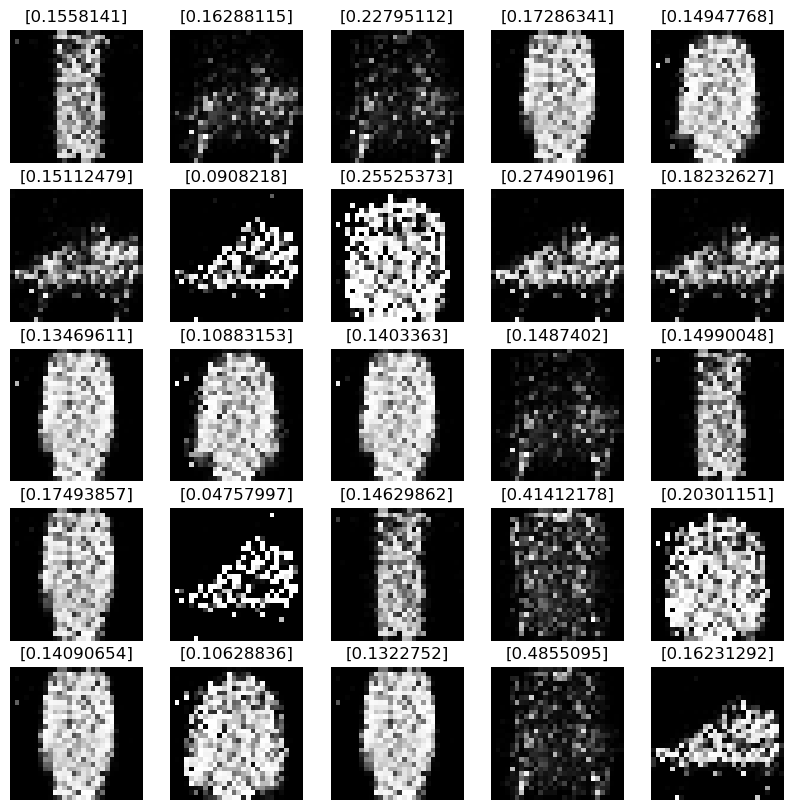

[Epoch 61/200] [D loss: 0.7745] [G loss: 4.0956]
[Epoch 62/200] [D loss: 0.7827] [G loss: 4.0355]
[Epoch 63/200] [D loss: 0.8093] [G loss: 4.0947]
[Epoch 64/200] [D loss: 0.7876] [G loss: 4.0293]
[Epoch 65/200] [D loss: 0.7994] [G loss: 4.0322]
[Epoch 66/200] [D loss: 0.7670] [G loss: 4.1452]
[Epoch 67/200] [D loss: 0.7867] [G loss: 4.0539]
[Epoch 68/200] [D loss: 0.7957] [G loss: 4.0855]
[Epoch 69/200] [D loss: 0.8325] [G loss: 3.9733]
[Epoch 70/200] [D loss: 0.7855] [G loss: 3.9647]


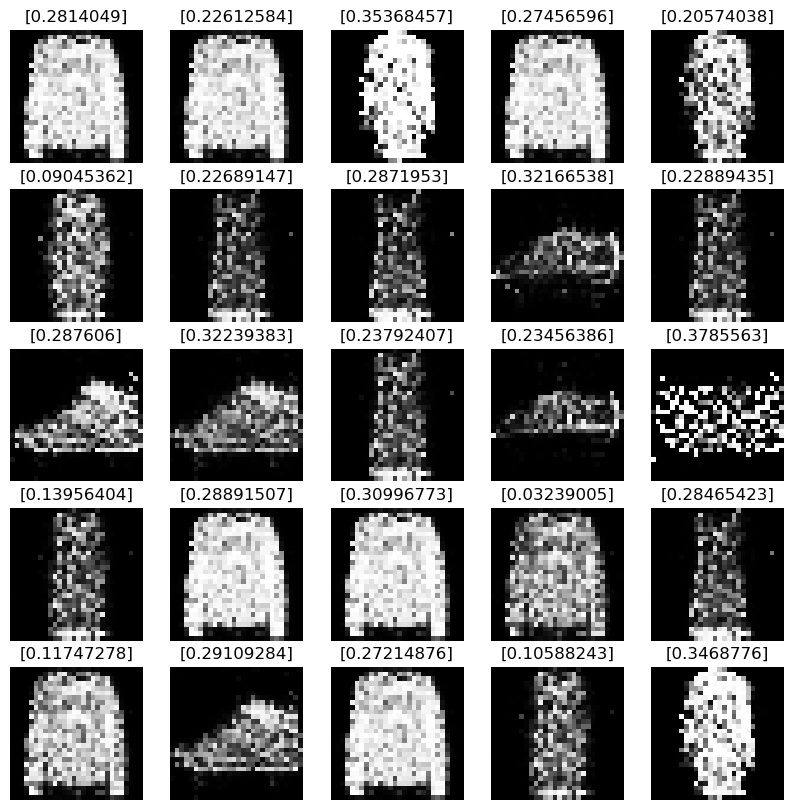

[Epoch 71/200] [D loss: 0.8031] [G loss: 3.8742]
[Epoch 72/200] [D loss: 0.7989] [G loss: 4.0113]
[Epoch 73/200] [D loss: 0.7096] [G loss: 4.3473]
[Epoch 74/200] [D loss: 0.7722] [G loss: 4.0891]
[Epoch 75/200] [D loss: 0.7640] [G loss: 4.0871]
[Epoch 76/200] [D loss: 0.7496] [G loss: 4.3200]
[Epoch 77/200] [D loss: 0.7959] [G loss: 4.0444]
[Epoch 78/200] [D loss: 0.7913] [G loss: 3.9326]
[Epoch 79/200] [D loss: 0.8058] [G loss: 3.9081]
[Epoch 80/200] [D loss: 0.7411] [G loss: 4.1006]


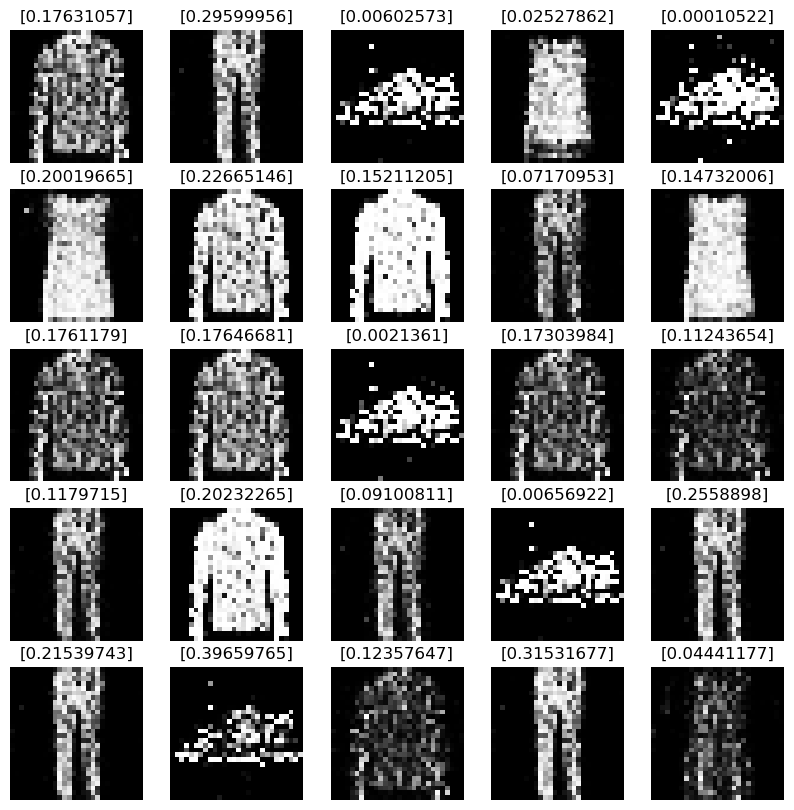

[Epoch 81/200] [D loss: 0.7075] [G loss: 4.1676]
[Epoch 82/200] [D loss: 0.6874] [G loss: 4.3551]
[Epoch 83/200] [D loss: 0.7063] [G loss: 4.1020]
[Epoch 84/200] [D loss: 0.7003] [G loss: 4.2570]
[Epoch 85/200] [D loss: 0.6998] [G loss: 4.1736]
[Epoch 86/200] [D loss: 0.7035] [G loss: 4.2140]
[Epoch 87/200] [D loss: 0.7068] [G loss: 4.2486]
[Epoch 88/200] [D loss: 0.7501] [G loss: 4.1079]
[Epoch 89/200] [D loss: 0.7119] [G loss: 4.1572]
[Epoch 90/200] [D loss: 0.7249] [G loss: 4.2629]


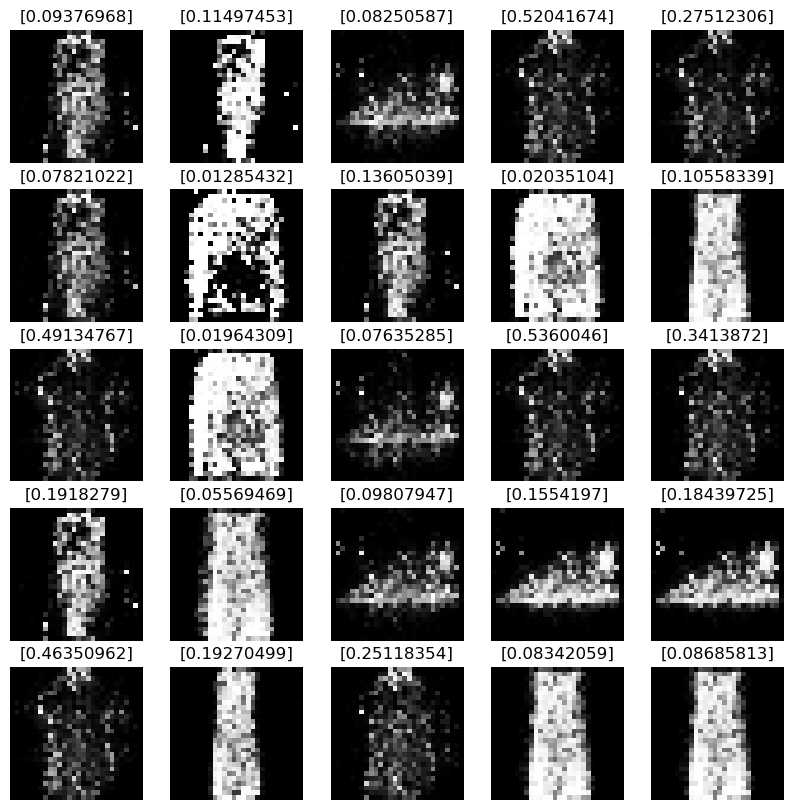

KeyboardInterrupt: 

In [54]:
# continue training
# however, generator will be trained twice in each epoch
# and with a higher learning rate
N_EPOCHS = 200

D_optimizer = optim.Adam(discriminator.parameters(), lr=LR, betas=(B1, B2))
G_optimizer = optim.Adam(generator.parameters(), lr=2 * LR, betas=(B1, B2))
D_loss_list, G_loss_list = [], []


for epoch in range(1, N_EPOCHS + 1): 
    
    D_loss_epoch, G_loss_epoch = 0, 0

    for index, (real_image, _) in enumerate(train_loader):
        
        discriminator.train()
        generator.train()

        D_optimizer.zero_grad()
        real_image = real_image.to(DEVICE)
        real_target = torch.ones(real_image.size(0), 1).to(DEVICE)
        fake_target = torch.zeros(real_image.size(0), 1).to(DEVICE)

        # train discriminator on real images
        D_real_loss = adversarial_loss(discriminator(real_image), real_target)

        # noise sampling and generate fake images
        noise = torch.randn(real_image.size(0), LATENT_DIM).to(DEVICE)
        fake_image = generator(noise)

        # train discriminator on fake images
        D_fake_loss = adversarial_loss(discriminator(fake_image.detach()), fake_target)

        # backprop and optimize
        D_total_loss = D_real_loss + D_fake_loss
        D_total_loss.backward()
        D_optimizer.step()
        D_loss_epoch += D_total_loss.item()

        # train generator
        G_optimizer.zero_grad()
        noise = torch.randn(real_image.size(0), LATENT_DIM).to(DEVICE)
        fake_image = generator(noise)
        G_loss = adversarial_loss(discriminator(fake_image), real_target)
        G_loss.backward()
        G_optimizer.step()
        G_loss_epoch += G_loss.item()

        # train generator again
        G_optimizer.zero_grad()
        noise = torch.randn(real_image.size(0), LATENT_DIM).to(DEVICE)
        fake_image = generator(noise)
        G_loss = adversarial_loss(discriminator(fake_image), real_target)
        G_loss.backward()
        G_optimizer.step()
        G_loss_epoch += G_loss.item()

    D_loss_list.append(D_loss_epoch / len(train_loader))
    G_loss_list.append(G_loss_epoch / len(train_loader))

    print(f"[Epoch {epoch}/{N_EPOCHS}] [D loss: {D_loss_list[-1]:.4f}] [G loss: {G_loss_list[-1]:.4f}]")
    if epoch % 10 == 0 or epoch == 1:
        noise = torch.randn(25, LATENT_DIM).to(DEVICE)
        discriminator.eval()
        generator.eval()

        with torch.no_grad():
            fake_image = generator(noise).detach()
            prediction = discriminator(fake_image).detach()

            fake_image = fake_image.cpu().numpy()
            prediction = prediction.cpu().numpy()

            plt.figure(figsize=(10, 10))
            for i in range(25):
                plt.subplot(5, 5, i + 1)
                plt.imshow(fake_image[i].squeeze(), cmap='gray')
                plt.title(prediction[i])
                plt.axis('off')
            plt.show()
            

In [ ]:
#plot loss
plt.plot(D_loss_list, label='D loss')
plt.plot(G_loss_list, label='G loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# save the model
os.makedirs('saved_models', exist_ok=True)
torch.save(generator.state_dict(), 'saved_models/generator-2.pth')
torch.save(discriminator.state_dict(), 'saved_models/discriminator-2.pth')



In [ ]:
# load the model
generator = Generator().to(DEVICE)
discriminator = Discriminator().to(DEVICE)
generator.load_state_dict(torch.load('saved_models/generator-2.pth'))
discriminator.load_state_dict(torch.load('saved_models/discriminator-2.pth'))
generator.eval()

